# Pytorch quick start guide
Following https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html


In [106]:
import torch 
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor 

log_dir = 'runs/fashion_mnist_batchsize32'

## Prepare the data

In [107]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


In [108]:
batch_size = 32

# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([32, 1, 28, 28])
Shape of y:  torch.Size([32]) torch.int64


## Define the network and model 

In [109]:
# Get cpu or gpu device for training
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define the model 
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
        
model = NeuralNetwork().to(device)
print(model)
            
            

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [110]:
# Define the model loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

## Define training and testing loops.

In [111]:
# Lets define the training loop
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)  # move to device
        
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 10 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")
            
            
# We will check the model's performance against the test dataset to ensure it is learning 
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0 
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}, Avg loss: {test_loss:>8f} \n")
    

In [112]:
# Train the model
epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.295538 [   32/60000]
loss: 2.306184 [  352/60000]
loss: 2.323152 [  672/60000]
loss: 2.288911 [  992/60000]
loss: 2.295511 [ 1312/60000]
loss: 2.303659 [ 1632/60000]
loss: 2.287931 [ 1952/60000]
loss: 2.293912 [ 2272/60000]
loss: 2.291359 [ 2592/60000]
loss: 2.281396 [ 2912/60000]
loss: 2.281978 [ 3232/60000]
loss: 2.291832 [ 3552/60000]
loss: 2.284123 [ 3872/60000]
loss: 2.290116 [ 4192/60000]
loss: 2.272764 [ 4512/60000]
loss: 2.285068 [ 4832/60000]
loss: 2.274730 [ 5152/60000]
loss: 2.272319 [ 5472/60000]
loss: 2.276422 [ 5792/60000]
loss: 2.280143 [ 6112/60000]
loss: 2.268507 [ 6432/60000]
loss: 2.258799 [ 6752/60000]
loss: 2.265418 [ 7072/60000]
loss: 2.266451 [ 7392/60000]
loss: 2.262364 [ 7712/60000]
loss: 2.254867 [ 8032/60000]
loss: 2.239148 [ 8352/60000]
loss: 2.248078 [ 8672/60000]
loss: 2.260702 [ 8992/60000]
loss: 2.252290 [ 9312/60000]
loss: 2.250131 [ 9632/60000]
loss: 2.258880 [ 9952/60000]
loss: 2.261618 [10272/60000]
los

In [113]:
# Save the model 
torch.save(model.state_dict(), "models/model.pth")
print("Saved PyTorch Model State to models/model.pth")

Saved PyTorch Model State to models/model.pth


In [114]:
# Load the model
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("models/model.pth"))

<All keys matched successfully>

## Visualize prediction 

In [115]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')
    

Predicted: "Ankle boot", Actual: "Ankle boot"


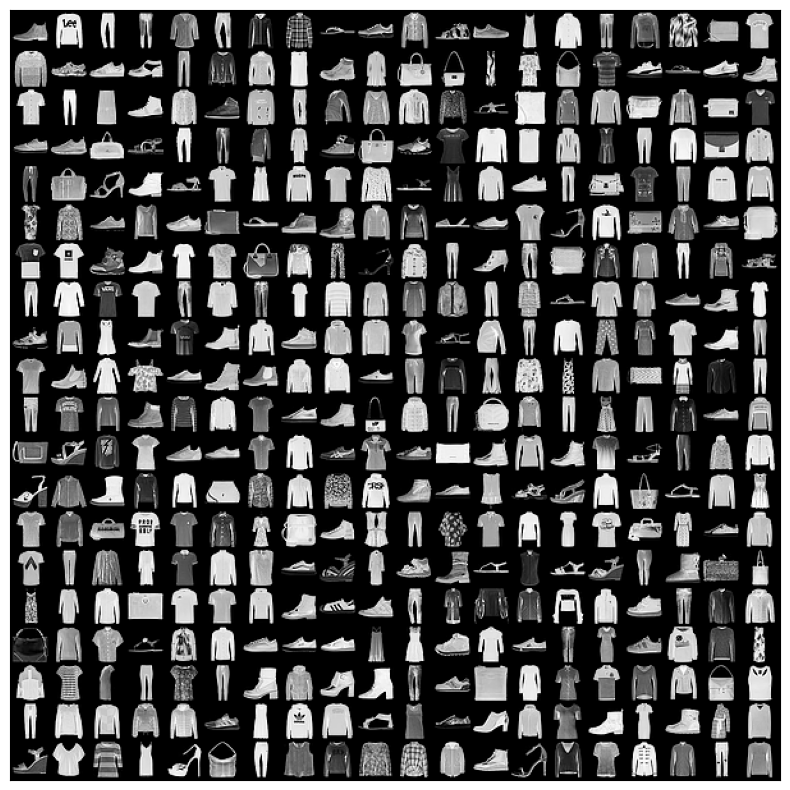

In [116]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'
def show(imgs, size=5):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    fig.set_size_inches(size, size)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        
from torchvision.utils import make_grid
grid = make_grid(test_data.data[:400].unsqueeze(1), nrow=20)
show(grid, size=10)


Predicted: "Shirt", Actual: "Pullover"


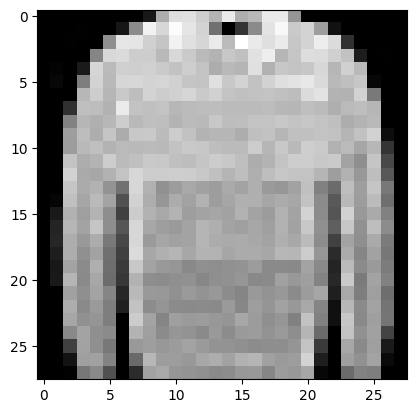

In [117]:

model.eval()
k = 20  # try different images by changing k
x, y = test_data[k][0], test_data[k][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')
    img = x.detach()
    img = F.to_pil_image(img)
    plt.imshow(np.asarray(img).squeeze(), cmap='gray')

# Now getting a bit more pro, train using tensorboard
This is following https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html


## Display images and the model graph. 

In [118]:
# Define tools to visualize examples. 
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

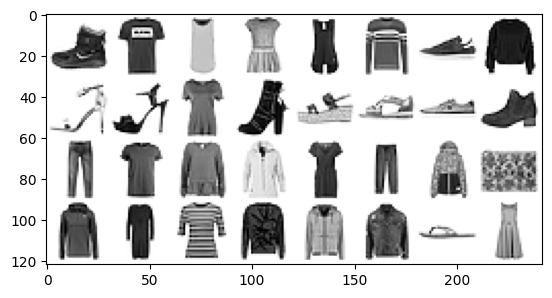

In [119]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter(log_dir)

# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# create grid of images
img_grid = make_grid(images)

# show images
matplotlib_imshow(img_grid, one_channel=True)

# write to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)

In [120]:
# Add the model graph
writer.add_graph(model, images.to(device))
writer.close()

## Ading a projector to visualize embeddings

In [121]:
# Helper function 
def select_n_random(data, labels, n=100):
    """
    Selects n random datapoints and their corresponding labels from a dataset
    """
    assert len(data) == len(labels)
    
    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# Select random images and their target indices
images, labels = select_n_random(training_data.data, training_data.targets)

# Get the class label for each image
class_labels = [classes[lab] for lab in labels]

# Log embeddings 
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                     metadata=class_labels,
                     label_img=images.unsqueeze(1))
writer.close()


## Tracking model training

In [122]:
# Init a new model from scratch
# Get cpu or gpu device for training
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define the model 
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
        
model = NeuralNetwork().to(device)

# Define the model loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

Using cuda device


In [123]:
import torch.nn.functional as nnF

def images_to_probs(net, images):
    """
    Takes in a net and a Tensor of images, returns the outputs of the network
    for those images
    """
    # pass the images through the network and use the outputs as the "provs"
    output = net(images)
    # send to cpu
    output, images = output.cpu(), images.cpu()
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [nnF.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]


def plot_classes_preds(net, images, labels):
    """
    Generates matplotlib Figure using a trained network, along with images
    and labels from a batch, that shows the network's top prediction along
    with its probability, alongside the actual label, coloring this
    information based on whether the prediction was correct or not.
    Uses the "images_to_provs" function.
    """
    preds, probs = images_to_probs(net, images)
    images = images.cpu()
    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(12, 6))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    return fig

In [124]:
# Now let's re-write the traing loop but adding TensorBoard to it.
num_epochs = 10
running_loss = 0.0
for epoch in range(num_epochs):
    for i, data in enumerate(train_dataloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients 
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 100 == 99: # every 10 mini-batches...
            # ... log the running loss
            writer.add_scalar('training loss',
                                running_loss / 1000,
                                epoch * len(train_dataloader) + i)
            # ... log a Matplotlib Figure showing the model's predictions on a
            # random mini-batch
            writer.add_figure('predictions vs. actuals',
                              plot_classes_preds(model, inputs, labels),
                              global_step=epoch * len(train_dataloader) + i)
            running_loss = 0.0
            
print('Finished Training')
                              

Finished Training
